#  Application detectenant les produits contienant l'huile de palme et recomande une meilleur alimentation.

##  <a name="C1"> Exploration des données

### 1. Chargement du jeu de données propre

In [213]:
# chargement  des packages
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import time 
from datetime import datetime
import pandas as pd
import os
import numpy as np
import math
import scipy.stats as st
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau, spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression, make_circles

import statsmodels.stats.multicomp as multi 
from functions import *

In [214]:
# gestion des erreurs
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [215]:
data = pd.read_csv("data_foot_clean.csv",sep=',')
data.head()

code nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
0  0000000003087                  d       unknown       unknown   
1  0000000024600                  d       unknown       unknown   
2  0000000027205                  d       unknown       unknown   
3  0000000036252                  e       unknown       unknown   
4  0000000039259                  d       unknown       unknown   

   ingredients_palm_oil_n  energy_100g  fat_100g  saturated-fat_100g  \
0                     0.0       1028.0       6.1                 1.6   
1                     0.0       1028.0       6.1                 1.6   
2                     0.0       1028.0       6.1                 1.6   
3                     0.0       1883.0      20.0                12.5   
4                     0.0       1028.0       6.1                 1.6   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                14.5          3.2         1.1            5.7    0.48557   
1                14.5          3.2         1.1            5.7    0.48557   
2                14.5          3.2         1.1            5.7    0.48557   
3                70.0          3.2         2.5            2.5    0.09652   
4                14.5          3.2         1.1            5.7    0.48557   

   sodium_100g  nutrition-score-fr_100g  
0        0.192                      9.0  
1        0.192                      9.0  
2        0.192                      9.0  
3        0.038                     22.0  
4        0.192                      9.0

In [216]:
data=data.drop("code",axis=1)
df=data.copy()


In [217]:
df.head()

nutrition_grade_fr pnns_groups_1 pnns_groups_2  ingredients_palm_oil_n  \
0                  d       unknown       unknown                     0.0   
1                  d       unknown       unknown                     0.0   
2                  d       unknown       unknown                     0.0   
3                  e       unknown       unknown                     0.0   
4                  d       unknown       unknown                     0.0   

   energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
0       1028.0       6.1                 1.6                14.5          3.2   
1       1028.0       6.1                 1.6                14.5          3.2   
2       1028.0       6.1                 1.6                14.5          3.2   
3       1883.0      20.0                12.5                70.0          3.2   
4       1028.0       6.1                 1.6                14.5          3.2   

   fiber_100g  proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
0         1.1            5.7    0.48557        0.192                      9.0  
1         1.1            5.7    0.48557        0.192                      9.0  
2         1.1            5.7    0.48557        0.192                      9.0  
3         2.5            2.5    0.09652        0.038                     22.0  
4         1.1            5.7    0.48557        0.192                      9.0

### 2. Analyse univariée

**2.a. Variables qualitatives**

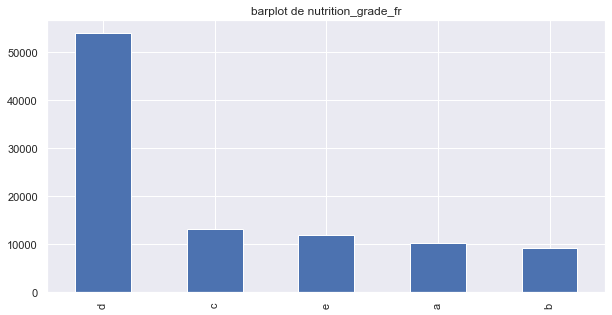

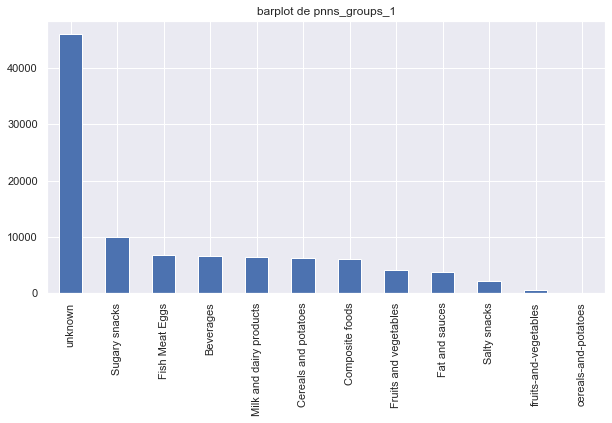

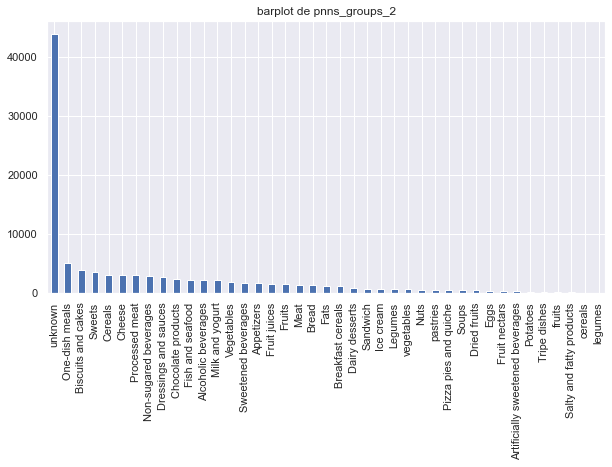

In [221]:
# diagramme en bar des variables catégorielles 
for col in df.select_dtypes('object'):
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot.bar()
    plt.title('barplot de '+col)
    plt.show()

On remarque qu'on a un nombre plus important de nutrition grade de nieveau d.quand aux pnns groups on note un nombre important de produit inconnus.

**2.a. Variables quantitatives**

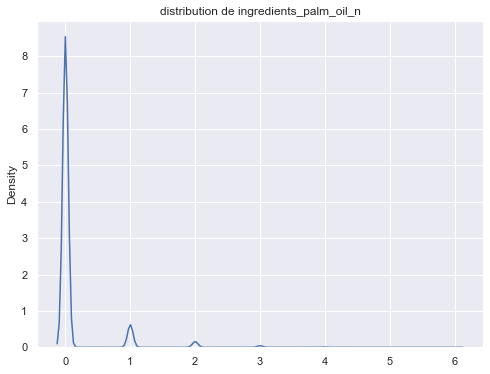

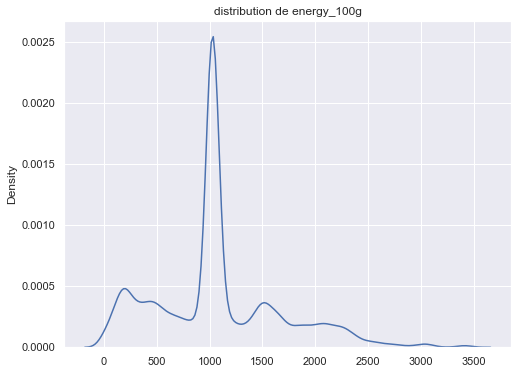

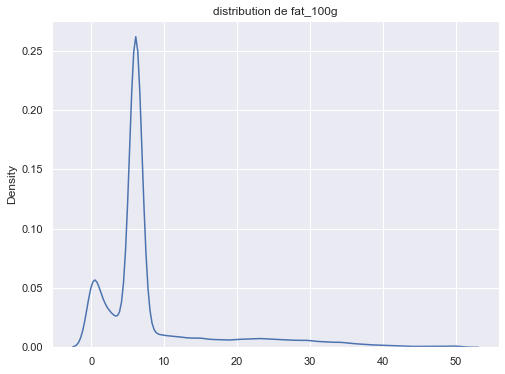

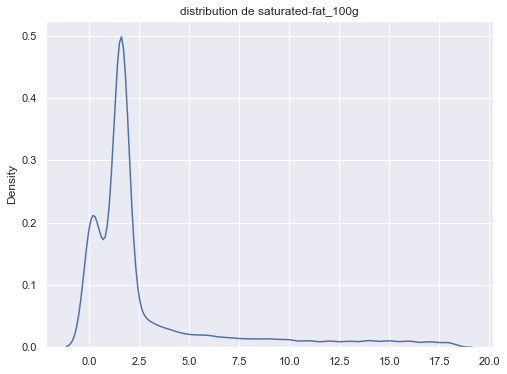

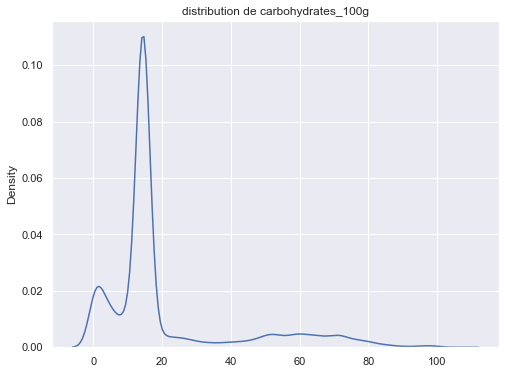

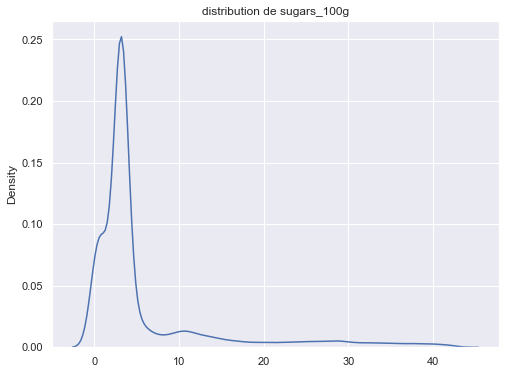

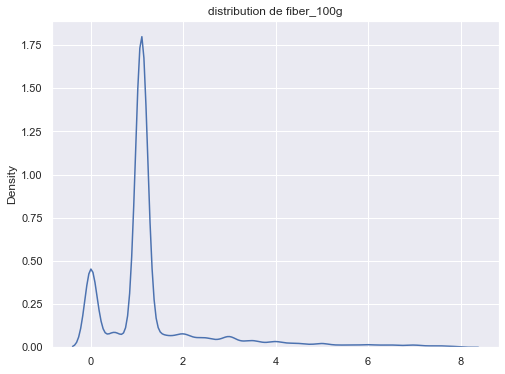

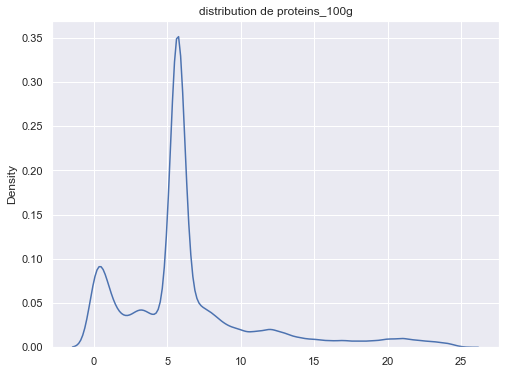

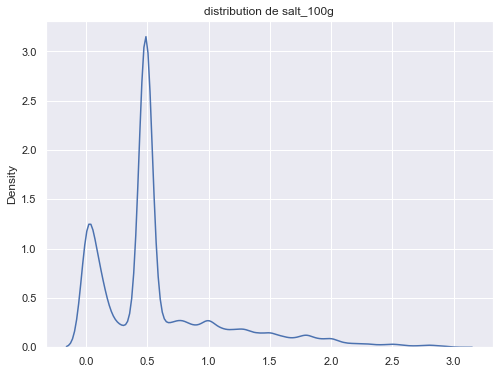

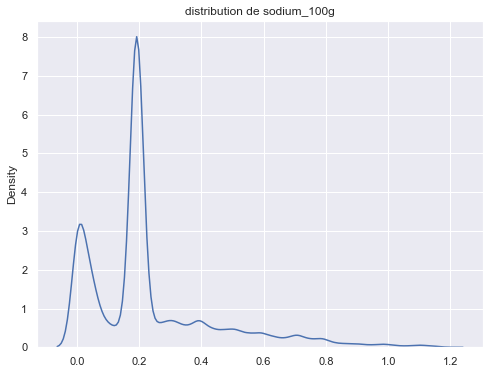

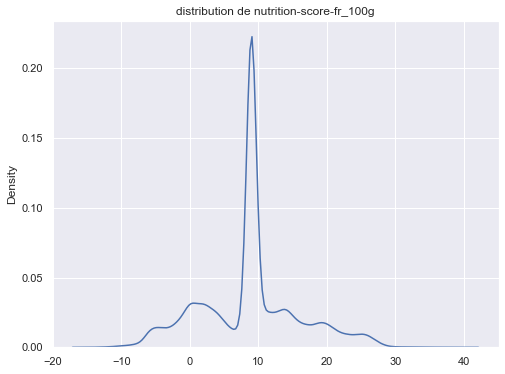

In [166]:
# disbutions des variables 
for col in df.select_dtypes('float'):
    plt.figure(figsize=(8,6))
    sns.distplot(df,x=df[col],hist=False)
    plt.title('distribution de '+col)
    plt.show()

### 2. Analyse bivariée

In [222]:
# choix de quelques modalités 
df1=df.loc[df['pnns_groups_1'].isin(['Sugary snacks','Cereals and potatoes','Beverages',
        'Composite foods',
       'Milk and dairy products', 'Salty snacks']),:]
df2=df.loc[df['pnns_groups_2'].isin(['Biscuits and cakes','pastries','Ice cream','One-dish meals','Chocolate products','Appetizers']),:]
df1.pnns_groups_2=df2.pnns_groups_2
df=df1

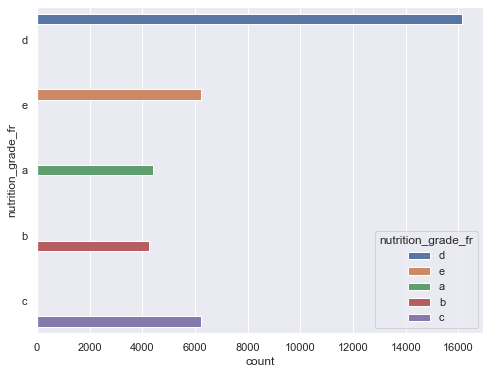

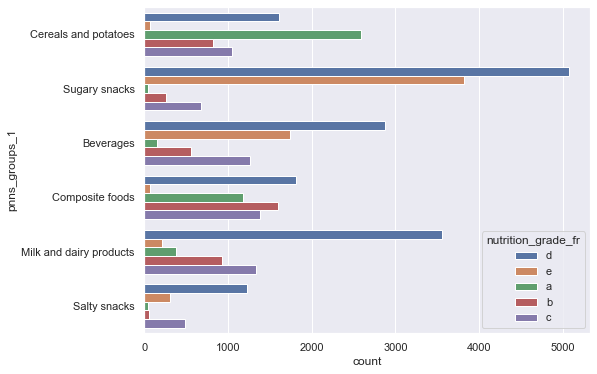

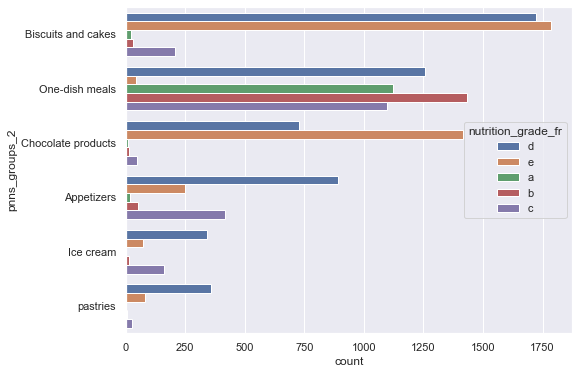

In [223]:

for col in df.select_dtypes('object'):
    plt.figure(figsize=(8,6))
    sns.countplot(y=col,hue='nutrition_grade_fr',data=df)
    

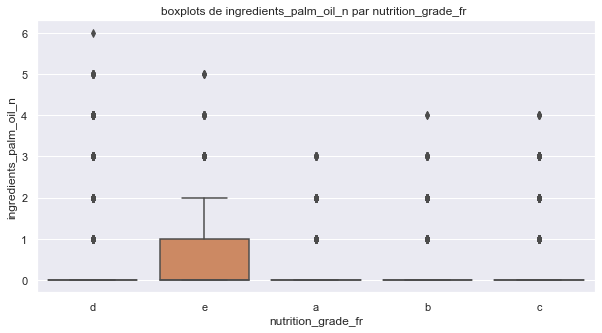

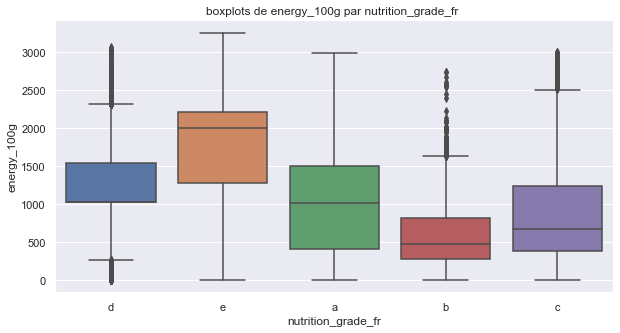

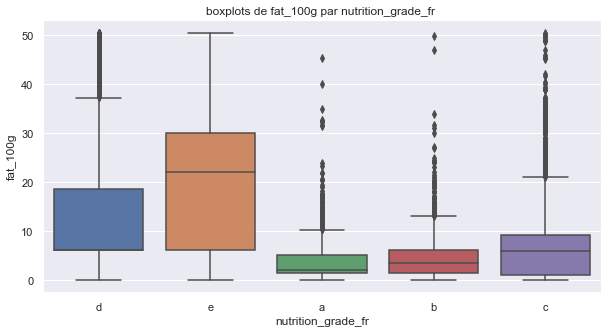

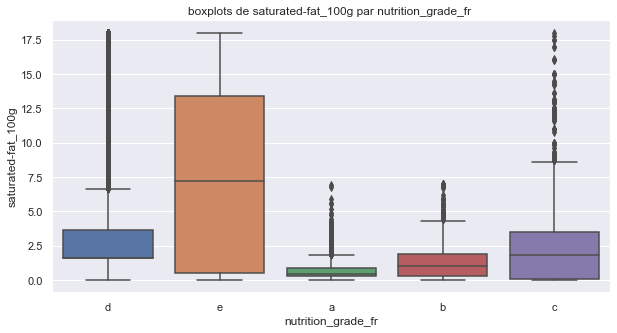

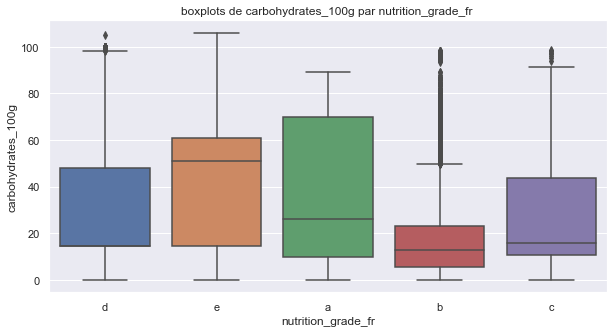

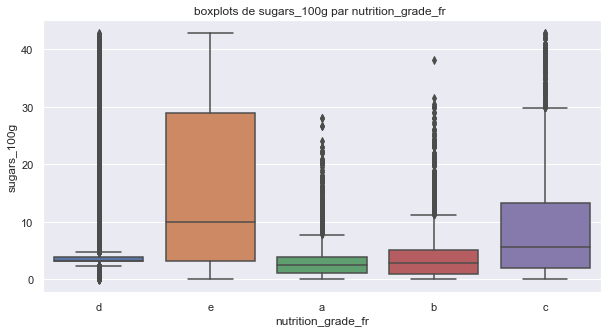

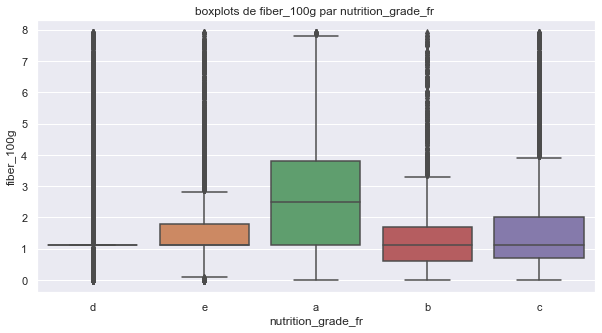

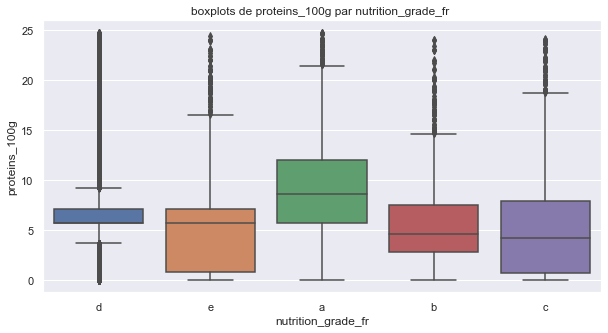

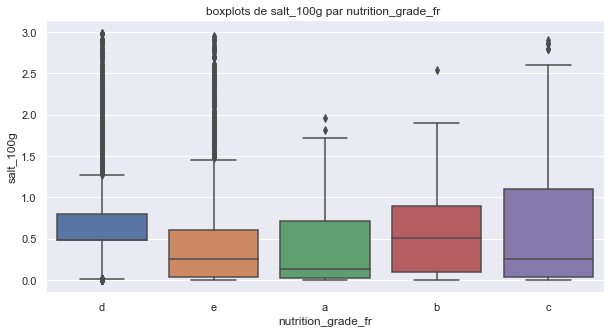

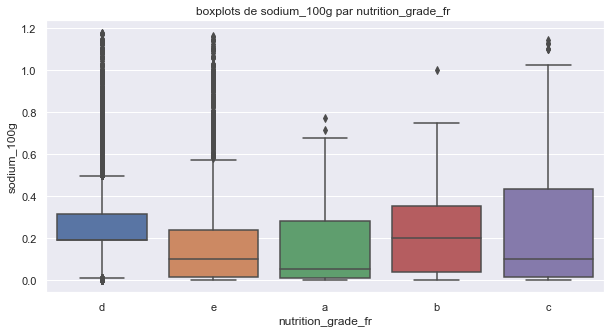

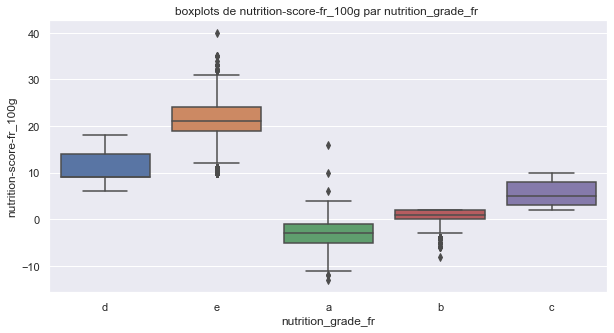

In [224]:
# boxplots des varialbes qunatitatives
for col in df.select_dtypes('float'):
  plt.figure(figsize=(10,5))
  plt.subplot()
  sns.boxplot(y= df[col],x='nutrition_grade_fr',data=df[[col,'nutrition_grade_fr']],orient='v')
  plt.title('boxplots de '+col +' par nutrition_grade_fr ')
  plt.show()
  

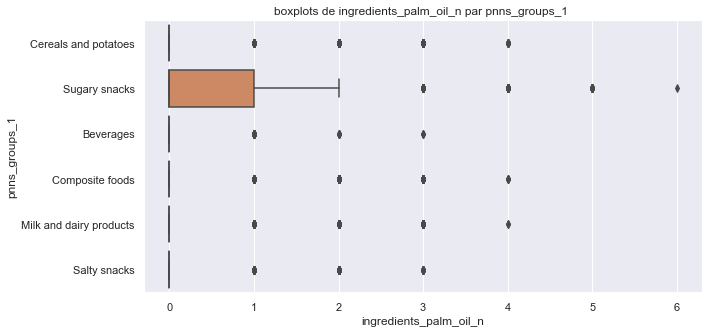

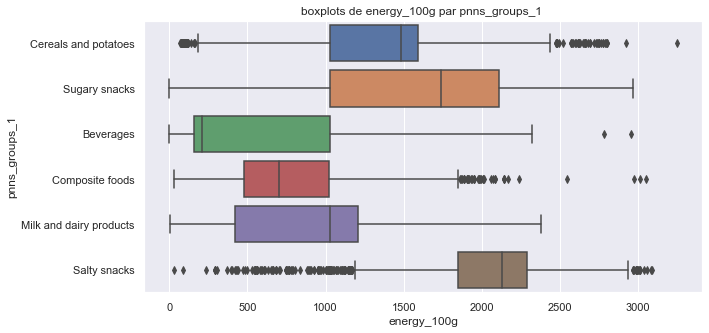

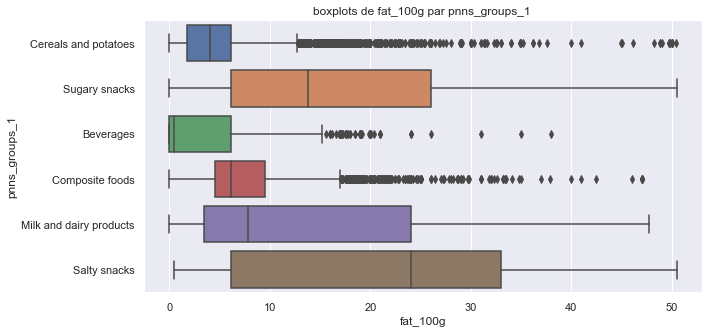

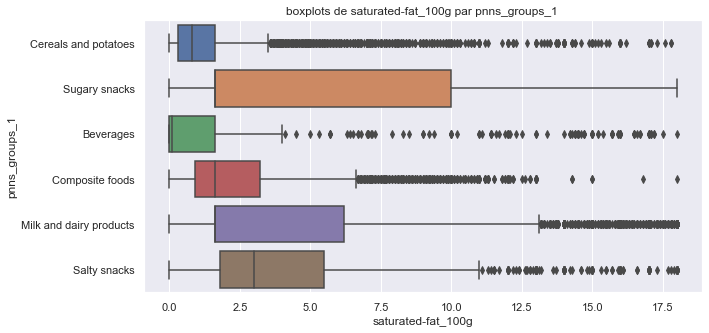

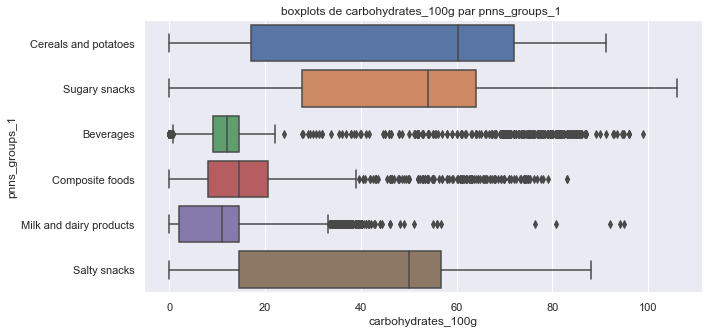

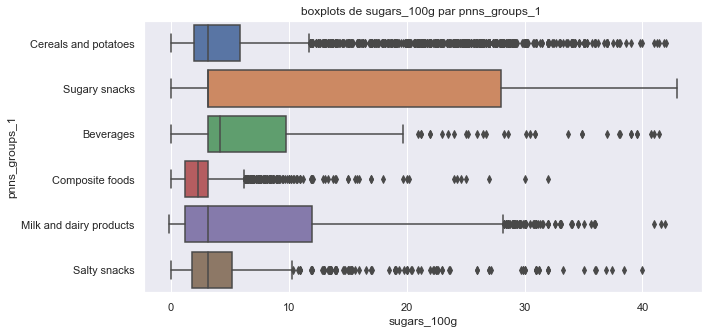

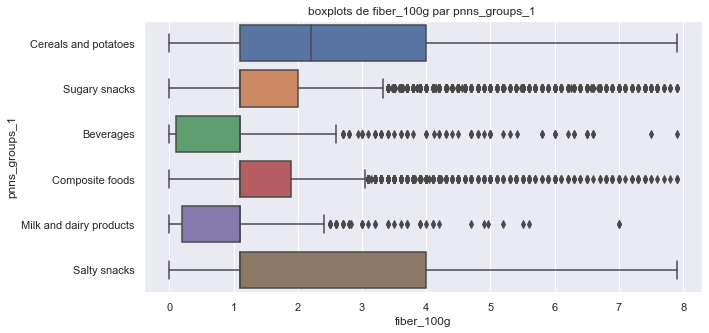

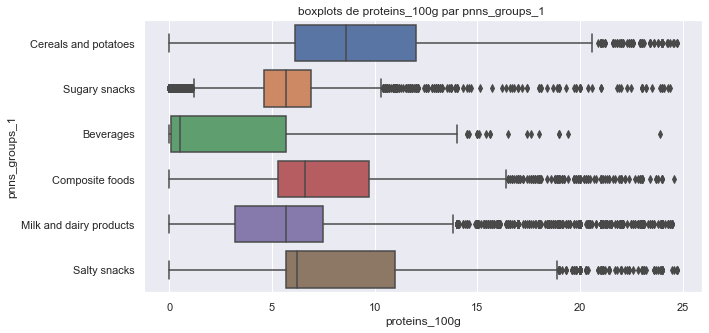

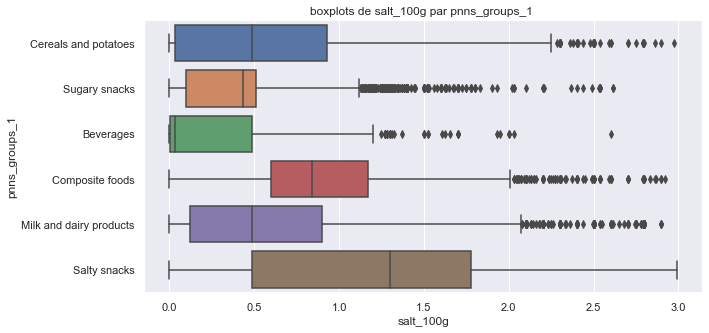

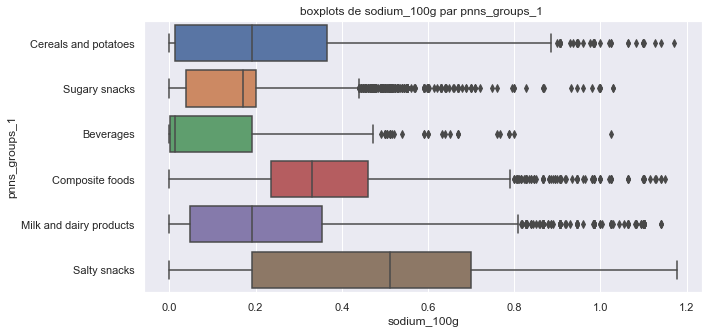

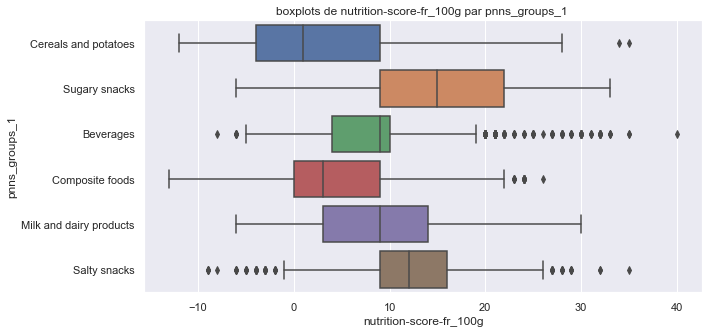

In [225]:
# boxplots des varialbes
for col in df.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    plt.subplot()
    sns.boxplot(x= df[col],y="pnns_groups_1",data=df[[col,"pnns_groups_1"]],orient='h')
    plt.title('boxplots de '+col +' par pnns_groups_1 ')
    plt.show()

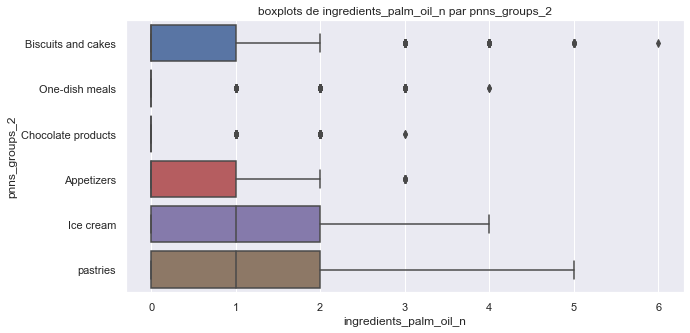

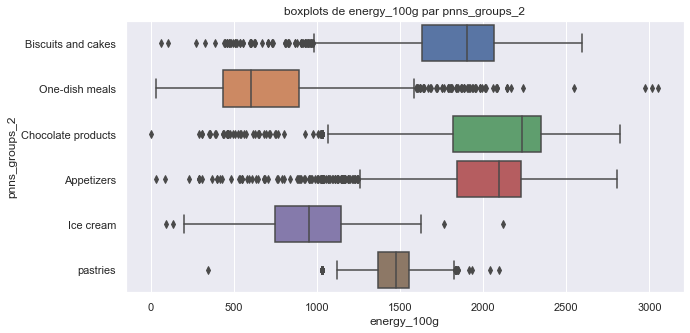

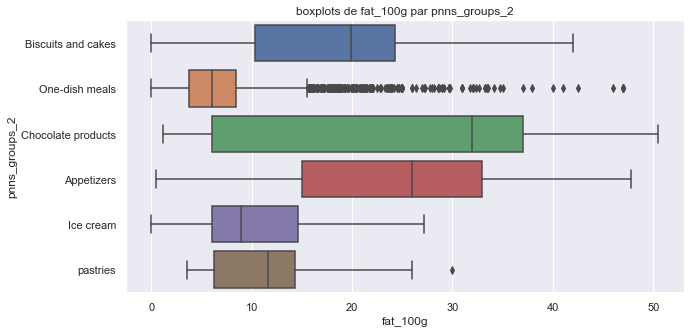

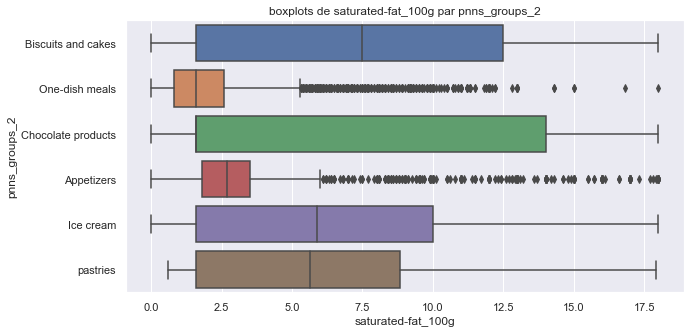

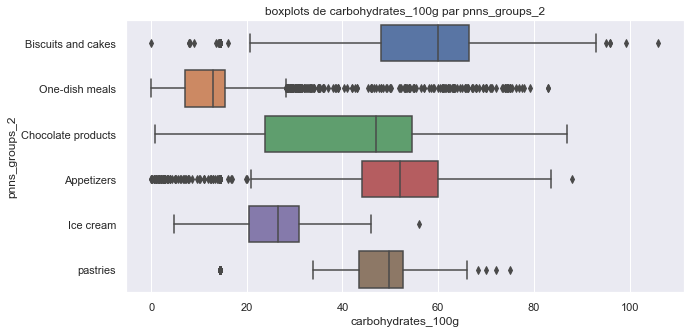

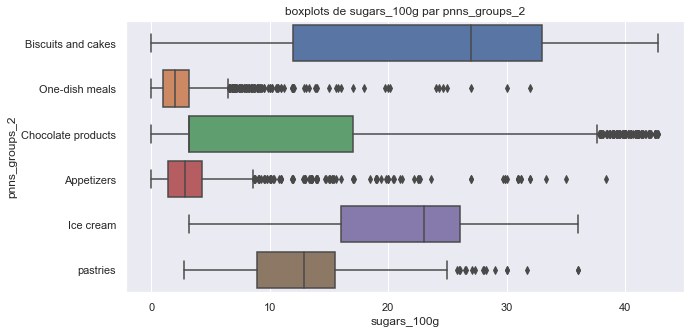

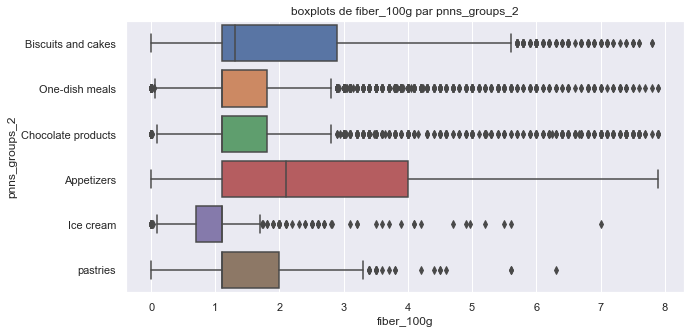

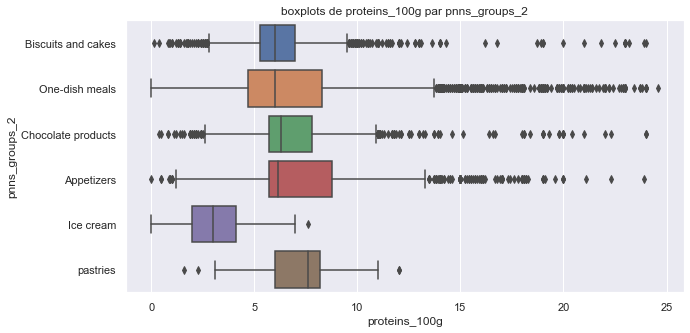

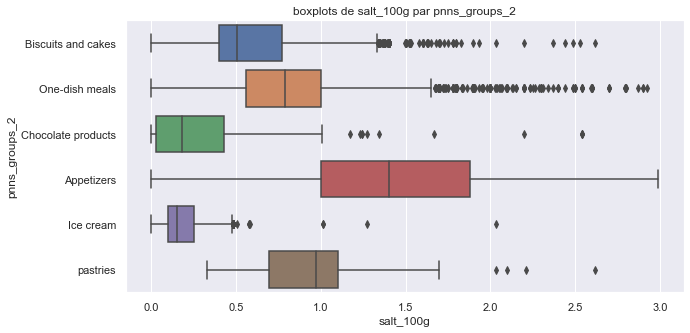

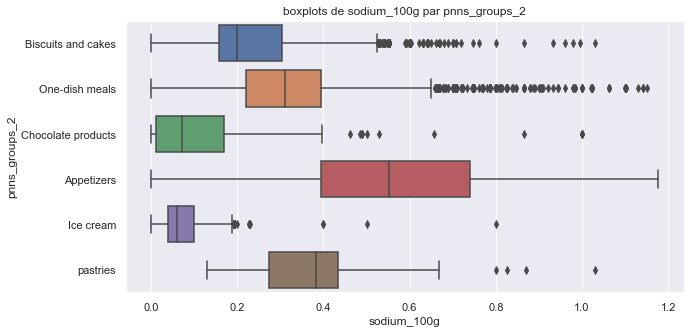

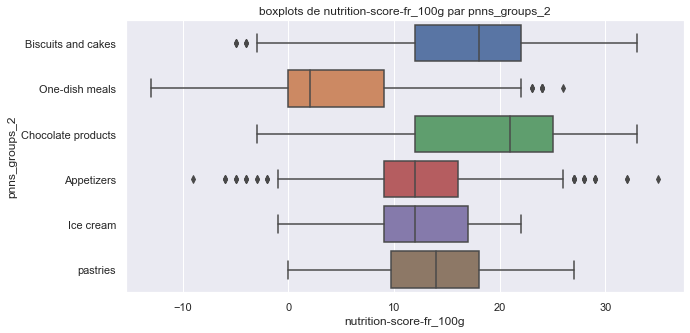

In [226]:
# boxplots des varialbes
for col in df.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    plt.subplot()
    sns.boxplot(x= df[col],y='pnns_groups_2',data=df[[col,'pnns_groups_2']],orient='h')
    plt.title('boxplots de '+col +' par pnns_groups_2')
    plt.show()

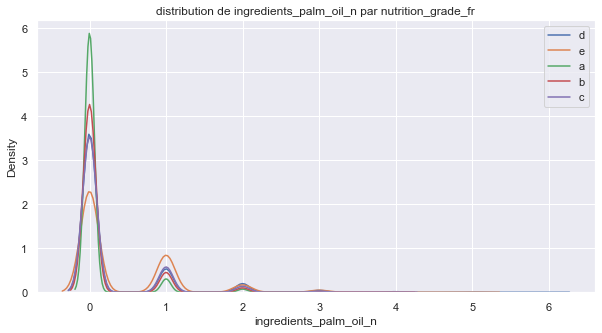

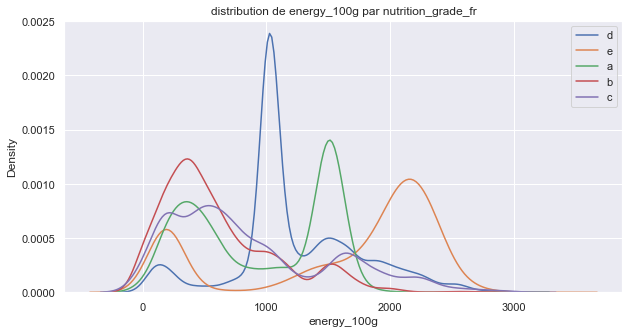

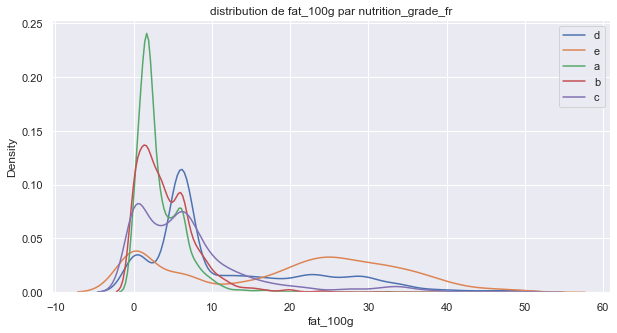

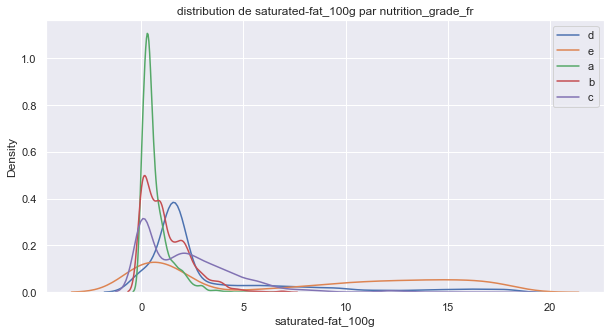

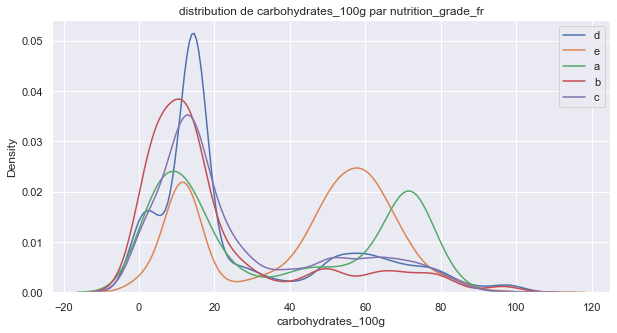

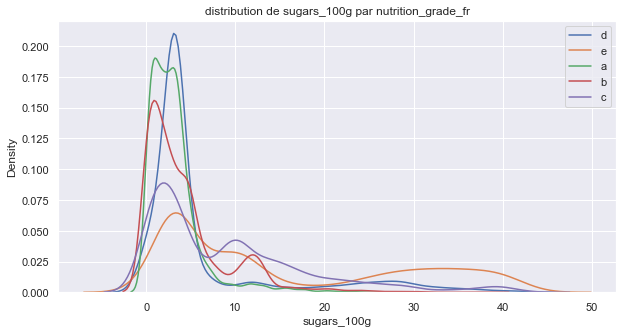

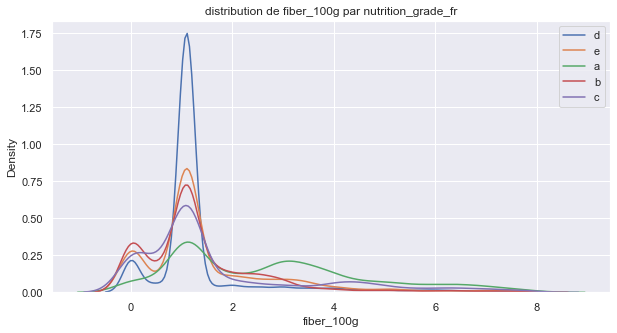

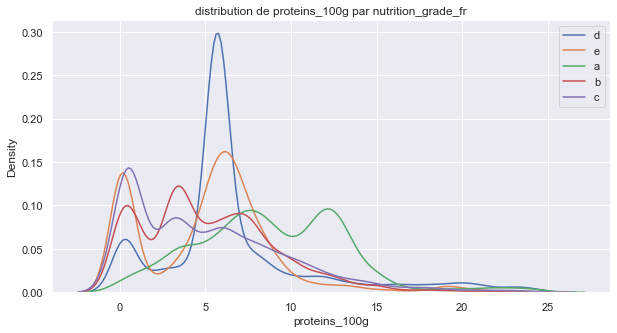

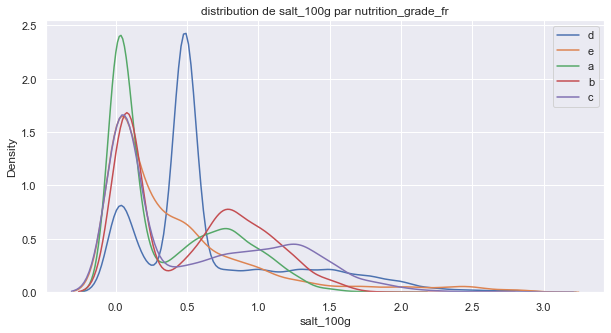

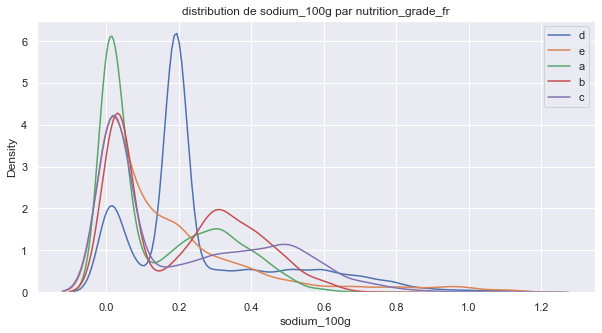

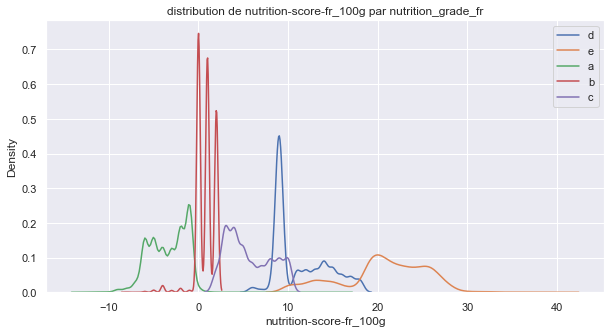

In [227]:
#distribution des variables quantitatives selon la nutrition_grade_fr
for col in df.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    for g in df['nutrition_grade_fr'].unique():
      df2=df.loc[df['nutrition_grade_fr'].str.contains(g, na=False,case=False)]
      sns.distplot(df2[col],label=g,hist=False)
      plt.title('distribution de '+col+' par nutrition_grade_fr')
      plt.legend()
    
    

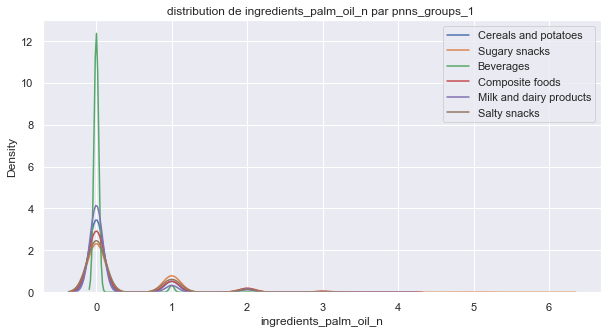

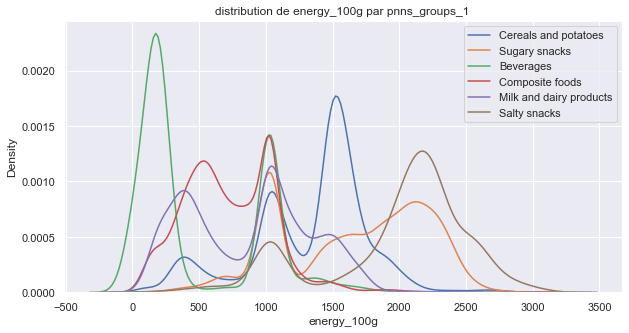

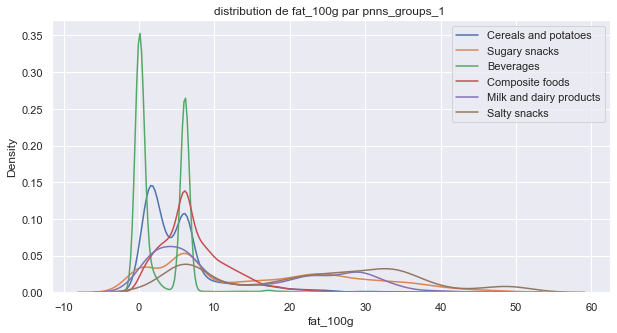

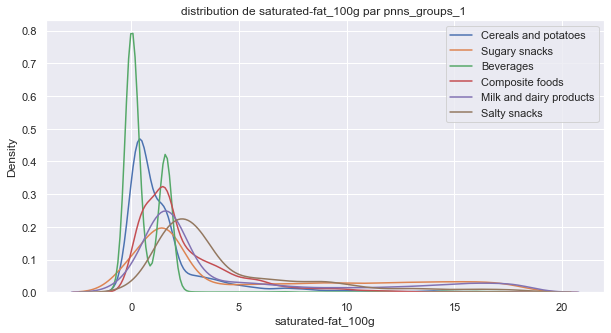

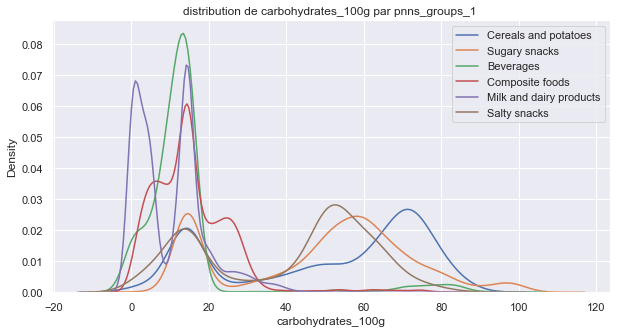

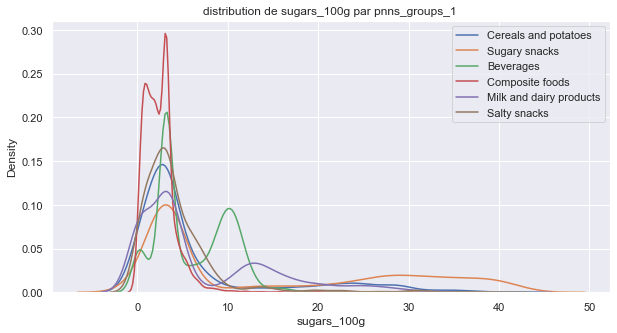

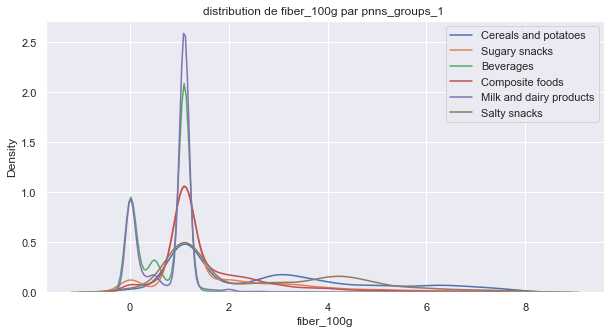

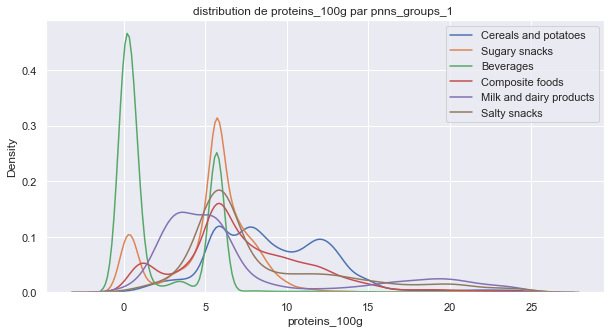

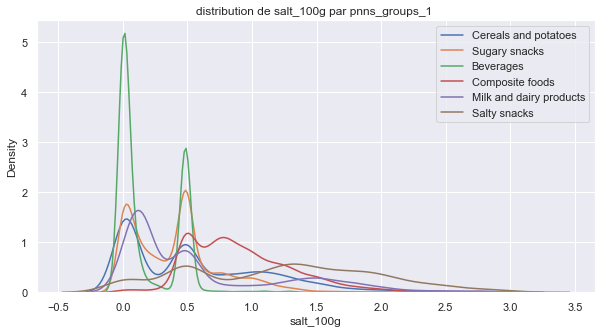

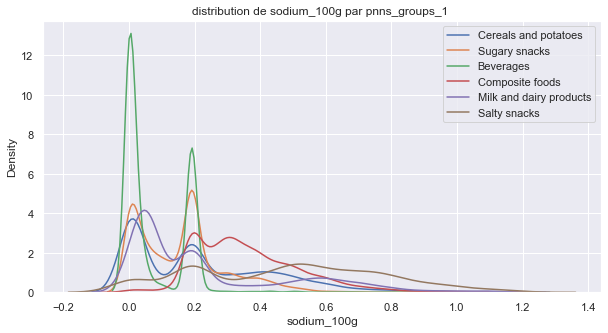

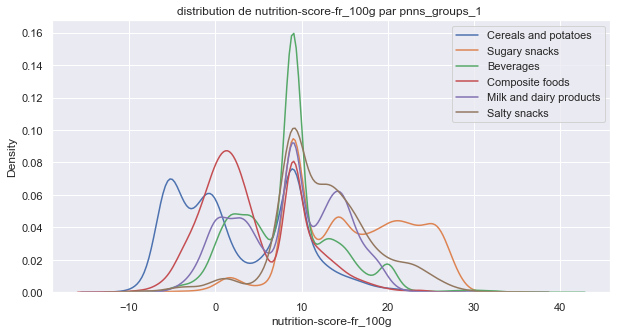

In [228]:
#distribution des variables quantitatives selon le pnns_groups_1
for col in df.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    for g in df['pnns_groups_1'].unique():
      df2=df.loc[df['pnns_groups_1'].str.contains(g, na=False,case=False)]
      sns.distplot(df2[col],label=g,hist=False)
      plt.title('distribution de '+col + ' par pnns_groups_1 ')
      plt.legend()
    

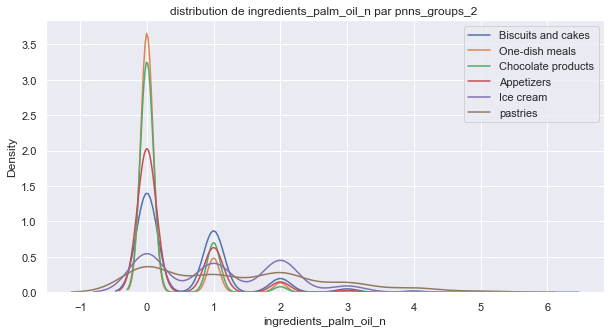

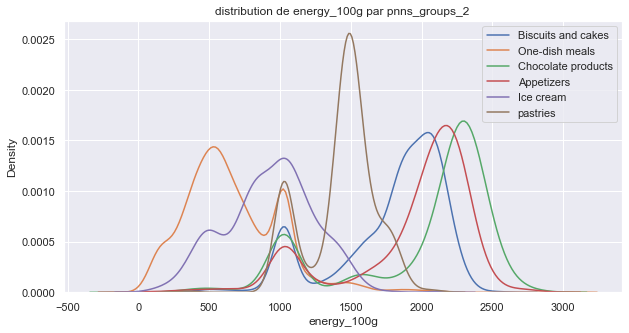

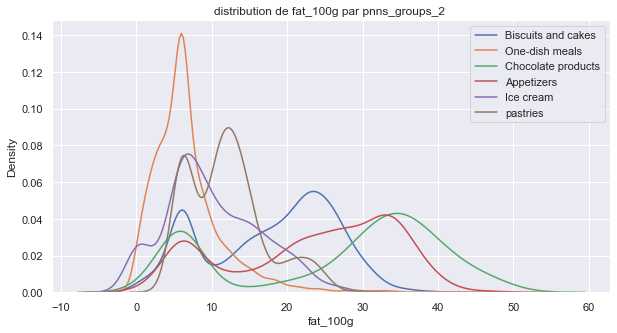

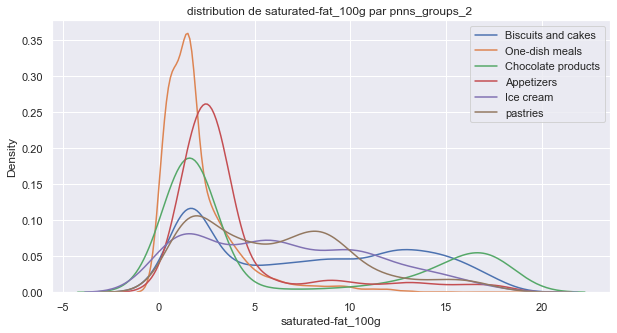

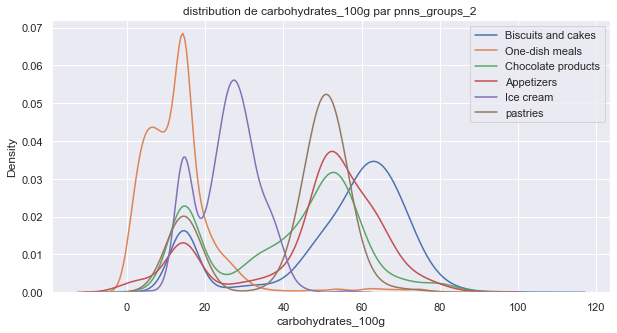

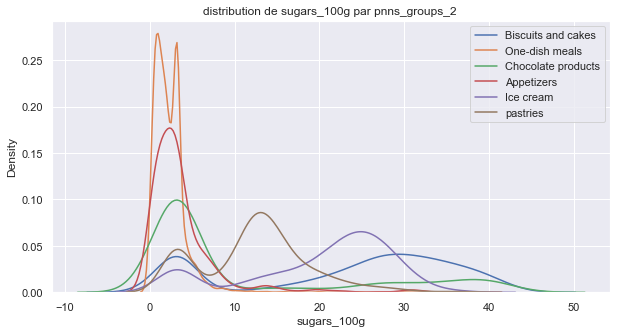

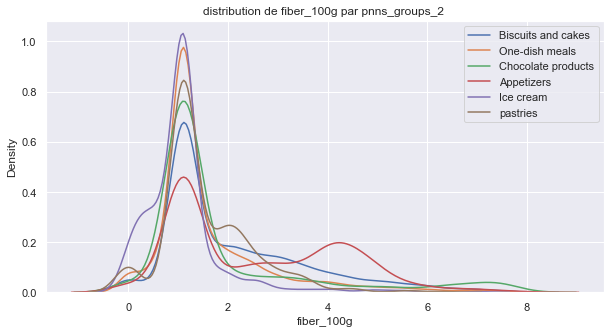

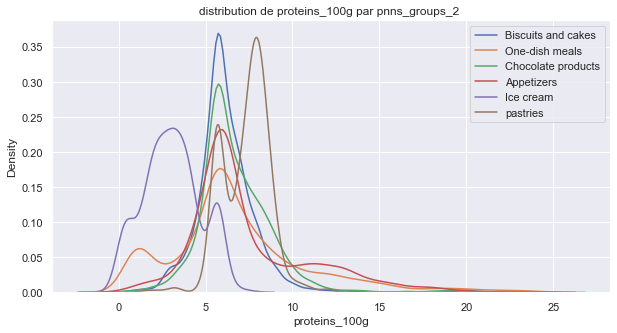

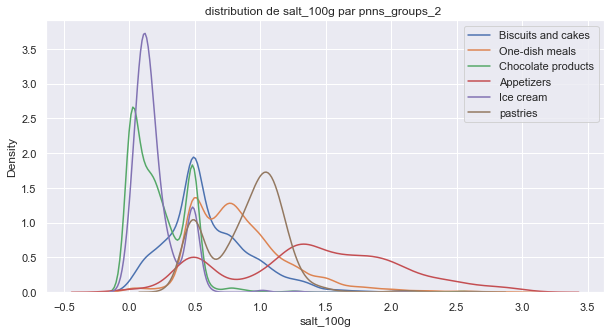

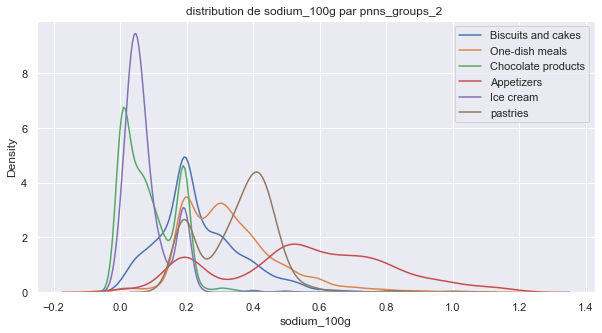

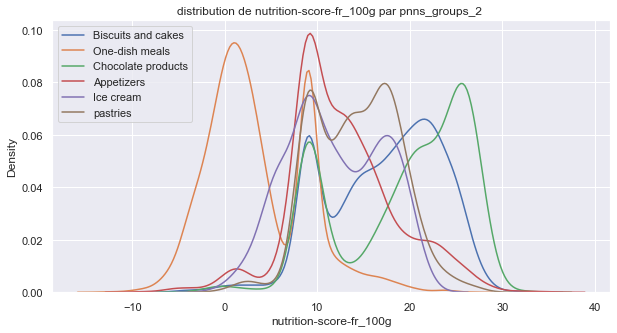

In [229]:
#distribution des variables quantitatives selon le pnns_groups_2
#distribution des variables quantitatives selon le pnns_groups_1
df=df.loc[df['pnns_groups_2'].isin(['Biscuits and cakes','pastries','Ice cream','One-dish meals','Chocolate products','Appetizers']),:]
for col in df.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    for g in df['pnns_groups_2'].unique():
        df2=df.loc[df['pnns_groups_2'].str.contains(g, na=False,case=False)]
        sns.distplot(df2[col],label=g,hist=False)
        plt.title('distribution de '+col + ' par pnns_groups_2 ')
        plt.legend()
    

### 2.b  Reduction de dimension : ACP


On veut reduire le nombre de variable en concervant 95 à 99% De la variance.

In [230]:
# on choisit la taille initiale des variables 
n_comp = 10

# import de l'échantillon
data =df

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[data.loc[:,'energy_100g':'nutrition-score-fr_100g'].columns]
 
# masse du ingredients_palm_oil_n auxquels appartient le pnns_groups (0.0, 1.0, 2.0, etc.)

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data['pnns_groups_1'] # ou data.index pour avoir les intitulés
features = data.loc[:,'energy_100g':'nutrition-score-fr_100g'].columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


PCA(n_components=10)

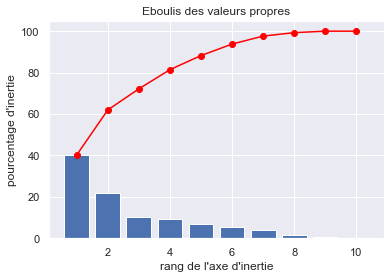

<Figure size 1440x720 with 0 Axes>

In [231]:
# Eboulis des valeurs propres
display_scree_plot(pca)

plt.figure(figsize=(20,10))
plt.show()

In [232]:
# On determine le nombre de compasantes pour faire l'acp
np.argmax(np.cumsum(pca.explained_variance_ratio_)>0.95)

6

In [233]:
# choix du nombre de composantes à calculer
n_comp = 7

# import de l'échantillon
data =df

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[data.loc[:,'energy_100g':'nutrition-score-fr_100g'].columns]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data['pnns_groups_1'] # ou data.index pour avoir les intitulés
features = data.loc[:,'energy_100g':'nutrition-score-fr_100g'].columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


PCA(n_components=7)

<Figure size 2160x1440 with 0 Axes>

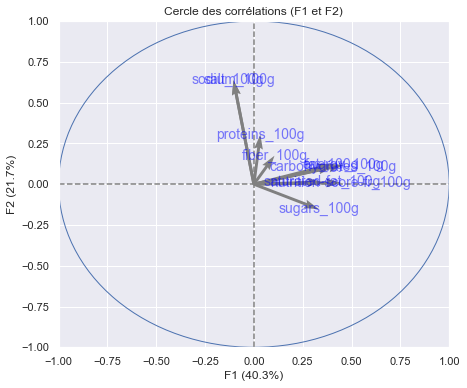

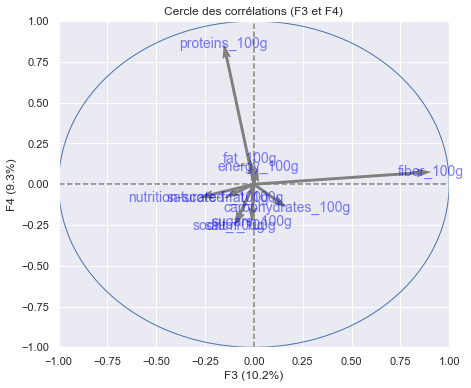

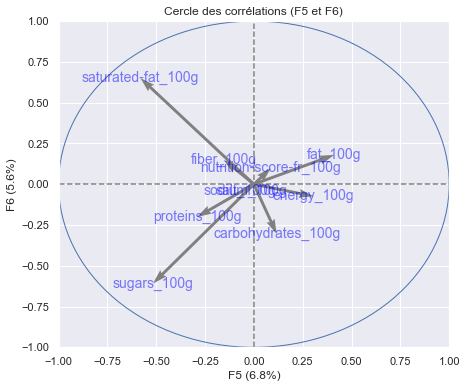

In [234]:
# Cercle des corrélations
pcs = pca.components_
plt.figure(figsize=(30,20))
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)],labels = np.array(features))
plt.show()


**2.b.1 Liaison entre les variables**

* Les variables energy_100g, carbohydrates_100g, nutrition-score-fr_100g:  sont corrélées avec l'axe $F_1$.


* salt_100g, sodium_100g sont corrélées avec l'axe $F_2$

* fiber_100g,carbohydrates_100g, nutrition-score-fr, sont corrélées à $F_3$

* proteins_100g est très corrélée à $F_4$

* fat_100g et proteins_100g sont corrélées à $F5$

* sugars_100g, , saturated-fat_100g sont très corrélées à $F6$

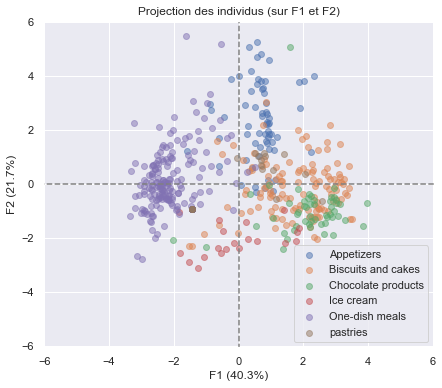

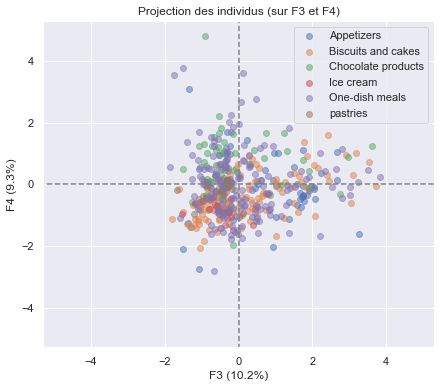

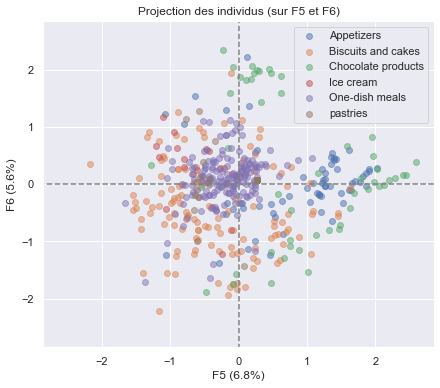

In [235]:
masse = [df.loc[course_id, "pnns_groups_2"] for course_id in df.index]
#plt.figure(figsize=(30,20))
X_projected = pca.transform(X_scaled)
idex=np.random.choice(X_projected.shape[0],500,replace=False)
display_factorial_planes(X_projected[idex,:], n_comp, pca, [(0,1),(2,3),(4,5)],illustrative_var = np.array(masse)[idex], alpha = 0.5)
plt.show()

* On voit que Biscuits and cakes,Chocolate products,  ont des abscisses tres grandes par rapport à F1. Ce que laisse dire ils sont peut etre riche en graisse.

* Ice cream, Appetizers ont des abscisses grandes en valeur absolues par rapport à F2, ce qui pourrait dire qu'ils ont riche en sodium.

* pastries, One-dish meals ont des abcissses legerement grandes par rapport à F3.



### 3. Analyse multivariée

**3.a Corrélations des variables quantitatives**

In [49]:
df.corr()

ingredients_palm_oil_n  energy_100g  fat_100g  \
ingredients_palm_oil_n                 1.000000     0.172989  0.195317   
energy_100g                            0.172989     1.000000  0.530677   
fat_100g                               0.195317     0.530677  1.000000   
saturated-fat_100g                     0.207233     0.455340  0.508591   
carbohydrates_100g                     0.266433     0.452354  0.154419   
sugars_100g                            0.192392     0.241437  0.178168   
fiber_100g                             0.108841     0.220366  0.110192   
proteins_100g                         -0.009080     0.228571  0.247222   
salt_100g                              0.071616     0.100884  0.236165   
sodium_100g                            0.071342     0.100823  0.235962   
nutrition-score-fr_100g                0.160371     0.614046  0.505366   

                         saturated-fat_100g  carbohydrates_100g  sugars_100g  \
ingredients_palm_oil_n             0.207233            0.266433     0.192392   
energy_100g                        0.455340            0.452354     0.241437   
fat_100g                           0.508591            0.154419     0.178168   
saturated-fat_100g                 1.000000            0.112131     0.250268   
carbohydrates_100g                 0.112131            1.000000     0.337382   
sugars_100g                        0.250268            0.337382     1.000000   
fiber_100g                         0.041215            0.319916     0.167983   
proteins_100g                      0.221912           -0.014696    -0.123785   
salt_100g                          0.187937           -0.104044    -0.154070   
sodium_100g                        0.187583           -0.104507    -0.154638   
nutrition-score-fr_100g            0.575417            0.175232     0.274841   

                         fiber_100g  proteins_100g  salt_100g  sodium_100g  \
ingredients_palm_oil_n     0.108841      -0.009080   0.071616     0.071342   
energy_100g                0.220366       0.228571   0.100884     0.100823   
fat_100g                   0.110192       0.247222   0.236165     0.235962   
saturated-fat_100g         0.041215       0.221912   0.187937     0.187583   
carbohydrates_100g         0.319916      -0.014696  -0.104044    -0.104507   
sugars_100g                0.167983      -0.123785  -0.154070    -0.154638   
fiber_100g                 1.000000       0.085141   0.038644     0.038381   
proteins_100g              0.085141       1.000000   0.404857     0.404889   
salt_100g                  0.038644       0.404857   1.000000     0.999988   
sodium_100g                0.038381       0.404889   0.999988     1.000000   
nutrition-score-fr_100g   -0.164236       0.051755   0.214098     0.214338   

                         nutrition-score-fr_100g  
ingredients_palm_oil_n                  0.160371  
energy_100g                             0.614046  
fat_100g                                0.505366  
saturated-fat_100g                      0.575417  
carbohydrates_100g                      0.175232  
sugars_100g                             0.274841  
fiber_100g                             -0.164236  
proteins_100g                           0.051755  
salt_100g                               0.214098  
sodium_100g                             0.214338  
nutrition-score-fr_100g                 1.000000

Text(0.5, 1.0, 'Matrice des corrélations des variables ')

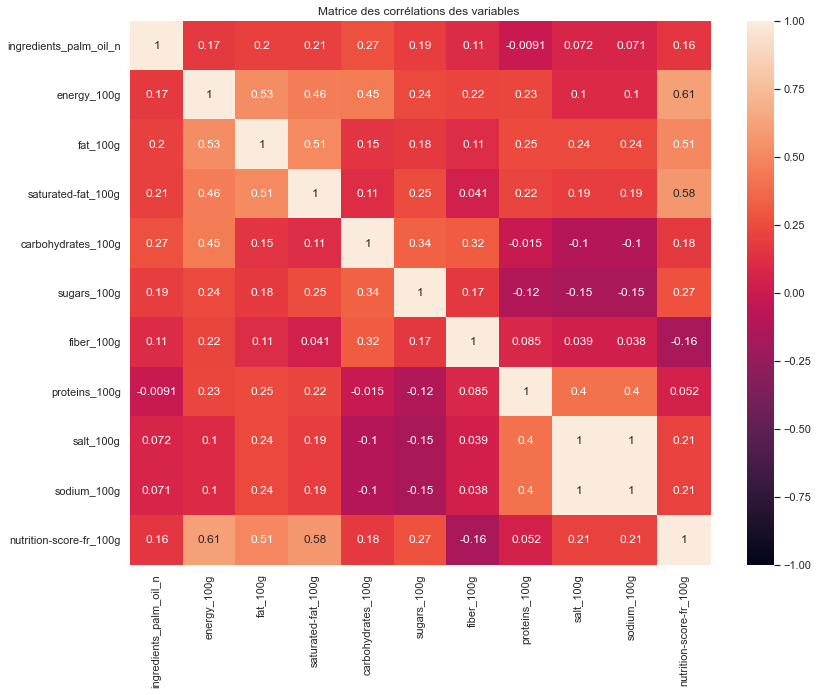

In [143]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Matrice des corrélations des variables ')

On voit que les variables sont corrélées entre elles et que l'ingredients_palm_oil_n est tres corrélées avec les varaibles: energy_100g, fat_100g, sugars_100g, saturated-fat_100g, carbohydrates_100g, nutrition-score-fr_100g par rapport aux autres variables.

### 3.b Test de pearson

C'est un test d'indépendance entre deux variables quantitatives

On pose les hypothèses de départ :

H0 : Variables indépendantes si p-value > 5%
H1 : Variables non indépendantes si p-value < 5%


In [16]:
df2=data[data.loc[:,'ingredients_palm_oil_n':'nutrition-score-fr_100g'].columns]

a = np.empty((len(df2.columns),len(df2.columns),))
a[:] = np.nan
for i in range(0,len(df2.columns)):
    for j in range(0,len(df2.columns)):
        a[i,j] = pearsonr(df2.iloc[:,i], df2.iloc[:,j])[1]

df_pvalue = round(pd.DataFrame(a, columns=df2.columns, index = df2.columns),5)

In [17]:

cm = sns.light_palette("green", as_cmap=True) 
df_pvalue.\
style.background_gradient(cmap=cm).set_precision(3)

La matarice des p-value nous affirme les corrélations entres les varaibles car les p-value sont toutes inferieurs à 5%

### 3.c Corrélation de l'ingrédient_palm_oil_n  avec les variables qualitatives

**3.c.1 ingrédient_palm_oil_n vs pnns_groups_1**

Text(0.5, 1.0, 'corrrélation entre pnns_groups_1 et ingredients_palm_oil_n ')

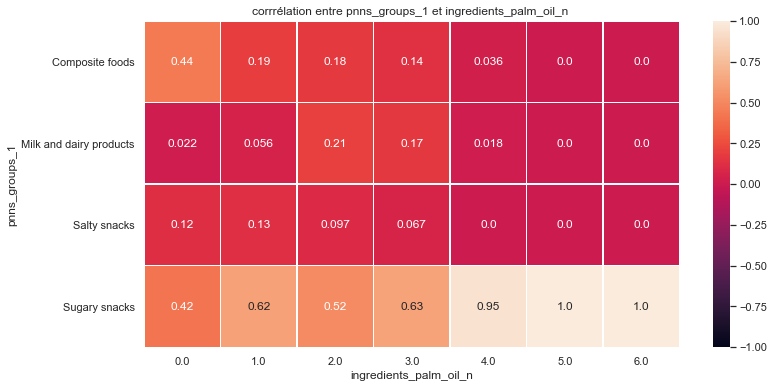

In [245]:
df1=df.loc[df['pnns_groups_1'].isin(['Sugary snacks','Cereals and potatoes','Beverages',
        'Composite foods',
       'Milk and dairy products', 'Salty snacks']),:]
heat1 =df1.groupby(['pnns_groups_1', 'ingredients_palm_oil_n'])['ingredients_palm_oil_n'].count().reset_index(name='counts')
fl = heat1.pivot("pnns_groups_1", "ingredients_palm_oil_n", "counts")
fl = fl.fillna(0)
fl=fl/fl.sum(axis=0)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(fl, annot=True, fmt='.2', vmin=-1, vmax=1,linewidths=.5, ax=ax)
plt.title('corrrélation entre pnns_groups_1 et ingredients_palm_oil_n ')

On voit que les produits comme sugary snacks,composite foots,cereals and patatoes contiennent un taux non négligeable d'ingrédient_palm_oil_n. Donc la variable ingrédient_palm_oil_n peut etre liée avec les pnns_groups_1. 

In [38]:
df_count = pd.crosstab(df.ingredients_palm_oil_n, df.pnns_groups_1)
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
p_value

0.0

Le test de khi2 montre que les variables ingrédient_palm_oil_n et pnns_groups_1 sont corrélées.

* **Le V de Cramer**


Le V de Cramer est la racine carrée du χ² divisé par le  $χ^2_{max}$.

$V=\sqrt{\frac{χ^2}{χ_{max}^2}}=\sqrt{\frac{χ^2}{n[min(l,c)-1]}}$

Plus $V$est proche de zéro, plus il y a indépendance entre les deux variables étudiées. Il vaut 1 en cas de complète dépendance puisque le χ² est alors égal au $χ²_{max}$ (dans un tableau 2 × 2, il prend une valeur comprise entre -1 et 1).

In [37]:
V=math.sqrt(Khi2_obs/(df.shape[0]*(min(df_count.shape[0],df_count.shape[1]-1))))
print("V=",V)

V= 0.1298866380066244


le V de cramer montre que ingrédient_palm_oil_n et pnns_groups_1 sont corrélées faiblement.

**3.c.2 ingrédient_palm_oil_n vs pnns_groups_2**

Text(0.5, 1.0, 'corrrélation entre pnns_groups_2 et ingredients_palm_oil_n ')

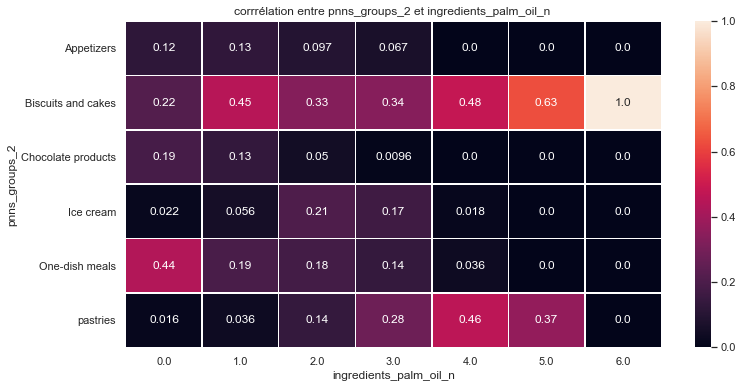

In [134]:
df1=df.loc[df['pnns_groups_2'].isin(['Biscuits and cakes','pastries','Ice cream','One-dish meals','Chocolate products','Appetizers']),:]
heat1 =df1.groupby(['pnns_groups_2', 'ingredients_palm_oil_n'])['ingredients_palm_oil_n'].count().reset_index(name='counts')
fl = heat1.pivot("pnns_groups_2", "ingredients_palm_oil_n", "counts")
fl = fl.fillna(0)
fl = fl/fl.sum(axis=0)
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(fl, annot=True, fmt=".2", linewidths=.5, ax=ax)
plt.title('corrrélation entre pnns_groups_2 et ingredients_palm_oil_n ')

On remarque que certains produits comme biscuits and cakes, pastries,Ice cream,One-dish meals,chocolate produts contiennent un taux non négligeable d'ingrédient_palm_oil_n. Donc la variable ingrédient_palm_oil_n peut etre liée avec les pnns_groups_2. 

* **Test de Khi2**

In [39]:
df_count = pd.crosstab(df.ingredients_palm_oil_n, df.pnns_groups_2)
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
p_value

0.0

Le test de khi2 montre que les variables ingrédient_palm_oil_n et pnns_groups_2 sont corrélées.

* **Le V de Cramer**

In [40]:
V=math.sqrt(Khi2_obs/(df.shape[0]*(min(df_count.shape[0],df_count.shape[1]-1))))
V

0.19690386207653285

Le V de cramer montre que ingredients_palm_oil_n et pnns_groups_2 sont corrélées faiblement.

**3.c.3 ingrédient_palm_oil_n vs nutrion_grade_fr**

Text(0.5, 1.0, 'corrrélation entre nutrition_grade_fr et ingredients_palm_oil_n ')

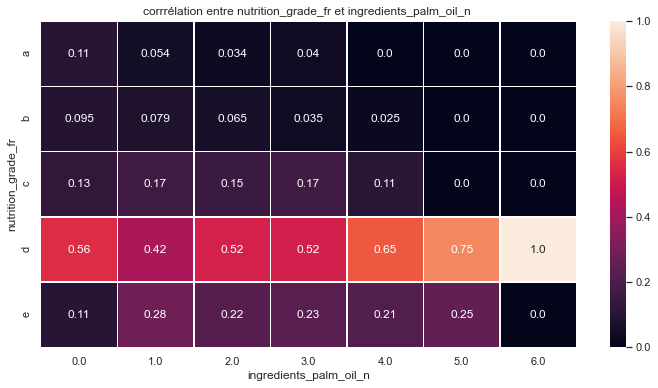

In [101]:
heat1 =df.groupby(['nutrition_grade_fr', 'ingredients_palm_oil_n'])['ingredients_palm_oil_n'].count().reset_index(name='counts')
fl = heat1.pivot("nutrition_grade_fr", "ingredients_palm_oil_n", "counts")
fl = fl.fillna(0)
fl = fl/fl.sum(axis=0)
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(fl, annot=True, fmt=".2", linewidths=.5, ax=ax)
plt.title('corrrélation entre nutrition_grade_fr et ingredients_palm_oil_n ')

On voit que palm oil a d comme nutrition grade, d'où une faible nutrition. Donc la variable ingrédient_palm_oil_n peut etre liée avec la nutrition_grade_fr. 

In [41]:
df_count = pd.crosstab(df.ingredients_palm_oil_n, df.nutrition_grade_fr)
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
p_value

0.0

Le test de khi2 montre que les variables ingrédient_palm_oil_n et nutrion_grade_fr sont corrélées.

* **Le V de Cramer**

In [466]:
V=math.sqrt(Khi2_obs/(df.shape[0]*(min(df_count.shape[0],df_count.shape[1]-1))))
V

0.07782951097608401

Le V de cramer montre que ingredients_palm_oil_n et nutrion_grade_fr sont corrélées faiblement.

### 4. Test d'anova a un facteur

On effectue une analyse de variance pour mesurer l’indépendance entre une variable qualitative et une quantitative.

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

H0 : Variables indépendantes si p-value > 5% 

H1 : Variables non indépendantes si p-value < 5%

Quand on dispose d’un petit échantillon, la pertinence de ce test repose sur la validation de plusieurs hypothèses :

-l’indépendance entre les échantillons de chaque groupe

-l’égalité des variances que l’on peut verifier avec un test de Bartlett.

-la normalité des résidus avec un test de Shapiro.

**4.a nutrition_grade_fr VS ingredients_palm_oil_n**

In [126]:
df.nutrition_grade_fr.unique()

array(['d', 'e', 'c', 'a', 'b'], dtype=object)

In [127]:
sns.set()
model=ols('ingredients_palm_oil_n ~ nutrition_grade_fr',data=df).fit()
sm.stats.anova_lm(model,typ=2)


sum_sq       df           F  PR(>F)
nutrition_grade_fr    290.832330      4.0  411.048697     0.0
Residual            17416.563941  98463.0         NaN     NaN

La p-value=0.0 est inferieure à 5%. Donc l'ingredients_palm_oil_n est lié à la nutrition grade.

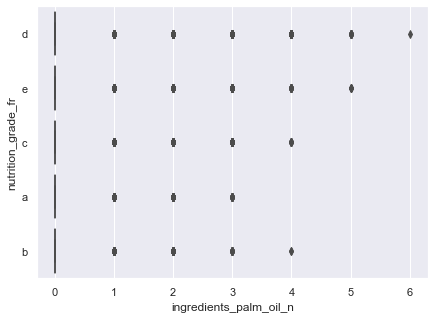

In [128]:

plt.subplots(figsize=(7,5))
ax = sns.boxplot(x="ingredients_palm_oil_n", y="nutrition_grade_fr", data=df)

In [282]:
df.groupby("nutrition_grade_fr")['ingredients_palm_oil_n'].agg('var')

nutrition_grade_fr
a    0.070258
b    0.115030
c    0.203678
d    0.167509
e    0.330037
Name: ingredients_palm_oil_n, dtype: float64

* **Test de bartlett**

In [283]:
bartlett(df.ingredients_palm_oil_n[df.nutrition_grade_fr == 'a'],
        df.ingredients_palm_oil_n[df.nutrition_grade_fr == 'b'],
        df.ingredients_palm_oil_n[df.nutrition_grade_fr == 'c'],
         df.ingredients_palm_oil_n[df.nutrition_grade_fr == 'd'],
         df.ingredients_palm_oil_n[df.nutrition_grade_fr == 'e'])

BartlettResult(statistic=7099.105016582805, pvalue=0.0)

La pvalue est inferieure 5% ,donc l'égalité des variances par groupe est bien verifée.

* **Normalité des résidus**

In [285]:
shapiro(model.resid)

ShapiroResult(statistic=0.4007648825645447, pvalue=0.0)

La pvalue est inferieure 5% ,donc la normalité des résidus est bien verifée.

**4.b pnns_groups_1 VS ingredients_palm_oil_n**

In [421]:
mod=ols('ingredients_palm_oil_n ~ pnns_groups_1',data=df).fit()
sm.stats.anova_lm(mod, typ=2)


sum_sq       df            F  PR(>F)
pnns_groups_1   2134.830501     12.0  1124.759722     0.0
Residual       15572.565770  98455.0          NaN     NaN

La p-value=0.0 est inferieure à 5%. Donc l'ingredients_palm_oil_n est lié aux pnns_groups_1.

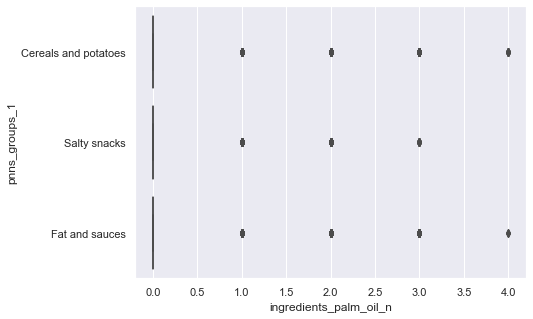

In [125]:
df1=df.loc[df['pnns_groups_1'].isin(['Cereals and potatoes','Salty snacks','Fat and sauces']),:]
plt.subplots(figsize=(7,5))
ax = sns.boxplot(x="ingredients_palm_oil_n", y="pnns_groups_1",data=df1)

In [119]:
df1.groupby("pnns_groups_1")['ingredients_palm_oil_n'].agg('var')

pnns_groups_1
Cereals and potatoes    0.302112
Fat and sauces          0.319955
Salty snacks            0.326984
Name: ingredients_palm_oil_n, dtype: float64

In [122]:
bartlett(df.ingredients_palm_oil_n[df.pnns_groups_1 == 'Cereals and potatoes'],
        df.ingredients_palm_oil_n[df.pnns_groups_1 == 'Fat and sauces'],
        df.ingredients_palm_oil_n[df.pnns_groups_1 == 'Salty snacks'])

BartlettResult(statistic=6.728829737728954, pvalue=0.034582245347540064)

La p-value=0.0 est inferieure à 5%. Donc l'ingredients_palm_oil_n est en lié aux pnns_groups_2.

**4.c pnns_groups_2 VS ingredients_palm_oil_n**

In [110]:
mod=ols('ingredients_palm_oil_n ~ pnns_groups_2',data=df).fit()
sm.stats.anova_lm(mod, typ=2)


sum_sq       df           F  PR(>F)
pnns_groups_2   3652.930231     40.0  639.559986     0.0
Residual       14054.466040  98427.0         NaN     NaN

La p-value=0.0 est inferieure à 5%. Donc l'ingredients_palm_oil_n est lié au pnns_groups_2.

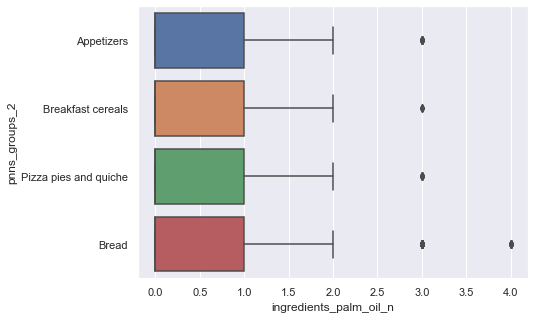

In [107]:
df1=df.loc[df['pnns_groups_2'].isin(['Pizza pies and quiche','Appetizers','Breakfast cereals','Bread']),:]
plt.subplots(figsize=(7,5))
ax = sns.boxplot(x="ingredients_palm_oil_n", y="pnns_groups_2", data=df1)

In [71]:
df1.groupby("pnns_groups_2")['ingredients_palm_oil_n'].agg('var')

pnns_groups_2
Appetizers               0.383112
Bread                    0.736760
Breakfast cereals        0.318638
Pizza pies and quiche    0.518561
Name: ingredients_palm_oil_n, dtype: float64

In [78]:
bartlett(df1.ingredients_palm_oil_n[df.pnns_groups_2 == 'Appetizers'],
        df1.ingredients_palm_oil_n[df.pnns_groups_2 == 'Bread'],
         df1.ingredients_palm_oil_n[df.pnns_groups_2 == 'Breakfast cereals'],
         df1.ingredients_palm_oil_n[df.pnns_groups_2 == 'Pizza pies and quiche'])

BartlettResult(statistic=261.29226393041796, pvalue=2.3619016376505886e-56)

La p-value=0.0 est inferieure à 5%. Donc l'ingredients_palm_oil_n est en lié aux pnns_groups_2.

 **4.d pnns_groups_1 vs nutrition_grade_fr**

Text(0.5, 1.0, 'corrrélation entre nutrition_grade_fr et pnns_groups_1')

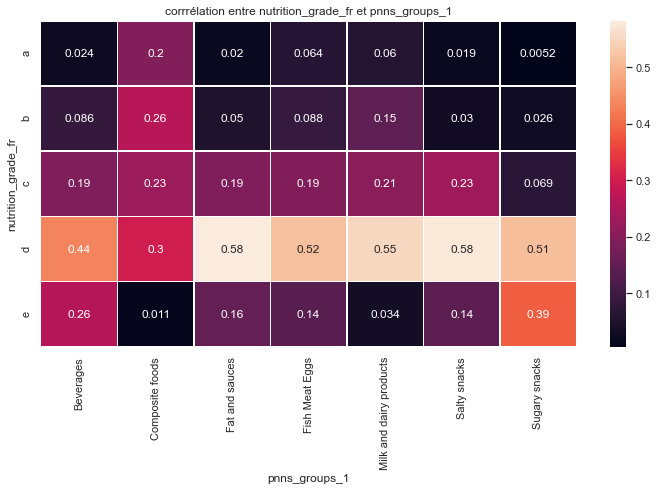

In [108]:
df1=df.loc[df['pnns_groups_1'].isin(['Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces']),:]
heat1 =df1.groupby(['nutrition_grade_fr', 'pnns_groups_1'])['pnns_groups_1'].count().reset_index(name='counts')
fl = heat1.pivot("nutrition_grade_fr", "pnns_groups_1", "counts")
fl = fl.fillna(0)
fl = fl/fl.sum(axis=0)
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(fl, annot=True, fmt=".2", linewidths=.5, ax=ax)
plt.title('corrrélation entre nutrition_grade_fr et pnns_groups_1')


On voit que sugary snacks, Milk and dairy,Beverages, fat and sauces ont une mauvaise nutrition.Donc la variable pnns_groups_1 peut etre liée avec la nutrition_grade_fr. 

In [105]:
#Test de khi2
df_count = pd.crosstab(df.pnns_groups_1, df.nutrition_grade_fr)
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
p_value

0.0

Le test de khi2 montre que les variables nutrition_grade_fr et pnns_groups_1 sont corrélées.

In [106]:
# V de cramer
V=math.sqrt(Khi2_obs/(df.shape[0]*(min(df_count.shape[0],df_count.shape[1]-1))))
V

0.292661112458879

Le V de cramer montre que nutrion_grade_fr et pnns_goups_1 sont corrélées faiblement.

**4.e pnns_groups_2 vs nutrition_grade_fr**

Text(0.5, 1.0, 'corrrélation entre nutrition_grade_fr et pnns_groups_2')

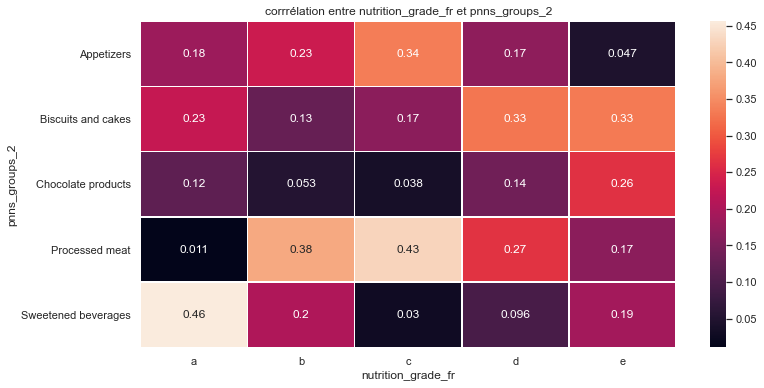

In [92]:
df1=df.loc[df['pnns_groups_2'].isin(['Biscuits and cakes','Sweetened beverages','Processed meat','Chocolate products','Appetizers']),:]
heat1 =df1.groupby(['pnns_groups_2','nutrition_grade_fr'])['nutrition_grade_fr'].count().reset_index(name='counts')
fl = heat1.pivot("pnns_groups_2", 'nutrition_grade_fr', "counts")
fl = fl.fillna(0)
fl = fl/fl.sum(axis=0)
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(fl, annot=True, fmt=".2", linewidths=.5, ax=ax)
plt.title('corrrélation entre nutrition_grade_fr et pnns_groups_2')

On voit qu'aussi chocolats products,Buscuits and cakes ont une mauvaise nutrition.Donc la variable pnns_groups_2 peut etre liée avec la nutrition_grade_fr. 

In [93]:
#Test de khi2
df_count = pd.crosstab(df.pnns_groups_2, df.nutrition_grade_fr)
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
p_value

0.0

Le test de khi2 montre que les variables nutrition_grade_fr et pnns_groups_2 sont corrélées.


In [94]:
# V de cramer
V=math.sqrt(Khi2_obs/(df.shape[0]*(min(df_count.shape[0],df_count.shape[1]-1))))
V

0.38117183299963686

Le V de cramer montre que nutrion_grade_fr et pnns_groups_2 sont corrélées faiblement.

### 5. Test anova a 2 facteurs

In [440]:
mod=ols('ingredients_palm_oil_n ~ C(pnns_groups_1)+C(nutrition_grade_fr)+C(pnns_groups_1):C(nutrition_grade_fr)',data=df).fit()
sm.stats.anova_lm(mod, typ=2)

sum_sq       df           F  \
C(pnns_groups_1)                         1433.967859     12.0  779.814843   
C(nutrition_grade_fr)                      31.612350      4.0   51.573916   
C(pnns_groups_1):C(nutrition_grade_fr)   1240.194424     48.0  168.609431   
Residual                                15079.851999  98408.0         NaN   

                                              PR(>F)  
C(pnns_groups_1)                        0.000000e+00  
C(nutrition_grade_fr)                   4.106417e-23  
C(pnns_groups_1):C(nutrition_grade_fr)  0.000000e+00  
Residual                                         NaN

La p-value=0.000 est inferieure à 5%. Donc l'inter-action pnns_groups_1 et nutrition grade est en rapport l'ingredients_palm_oil_n.

## 6. Conlusion

L'analyse de ce jeux de données nous montre que l'huile de palme est riche en en lipide et sucre.La corrélation des pnns_groups avec l'ingredients_poil_n nous revele que certains produits alimentaires contiennnent un taux important d'ingredient de lhuile de palme et que ce dernier est tres utilisé dans produits insdustrialisés tels ques les biscuits, les chocolats etc.

Cependant sa corrélation avec la nutrition grade nous laisse voir que plus qu'un produit contient de l'huile de palme plus sa nutrition est mauvais.Donc son utilisation doit etre moderée pour rester en bonne santé et surtout éviter certaine maladie cardiovasculaire. 